# Import Libraries

In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import plotly.express as px
from datetime import datetime
from scipy.stats import ttest_ind

# Import Data

In [4]:
# import data
crime_df = pd.read_csv('actes-criminels.csv')

# renaming categories for readability
crime_df["CATEGORIE"] = crime_df["CATEGORIE"].replace(to_replace="Vol de véhicule à moteur", value = "Vehicular Theft")
crime_df["CATEGORIE"] = crime_df["CATEGORIE"].replace(to_replace="Vol dans / sur véhicule à moteur", value = "Theft From Vehicle")
crime_df["CATEGORIE"] = crime_df["CATEGORIE"].replace(to_replace="Méfait", value = "Mischief")
crime_df["CATEGORIE"] = crime_df["CATEGORIE"].replace(to_replace="Vols qualifiés", value = "Robbery")
crime_df["CATEGORIE"] = crime_df["CATEGORIE"].replace(to_replace="Infractions entrainant la mort", value = "Murder")
crime_df["CATEGORIE"] = crime_df["CATEGORIE"].replace(to_replace="Introduction", value = "Breaking")
crime_df["QUART"] = crime_df["QUART"].replace(to_replace = "jour", value = "day")
crime_df["QUART"] = crime_df["QUART"].replace(to_replace = "soir", value = "evening")
crime_df["QUART"] = crime_df["QUART"].replace(to_replace = "nuit", value = "night")

crime_df.head()

,CATEGORIE,DATE,QUART,PDQ,X,Y,LONGITUDE,LATITUDE
0,Vehicular Theft,2018-09-13,day,30.0,294904.159001,5.047549e+06,-73.626778,45.567780
1,Vehicular Theft,2018-04-30,day,30.0,294904.159001,5.047549e+06,-73.626778,45.567780
2,Vehicular Theft,2018-09-01,night,7.0,290274.565000,5.042150e+06,-73.685928,45.519122
3,Mischief,2017-07-21,day,21.0,NaN,NaN,NaN,NaN
4,Mischief,2017-07-29,day,12.0,NaN,NaN,NaN,NaN


### Visualizing crime frequency by type

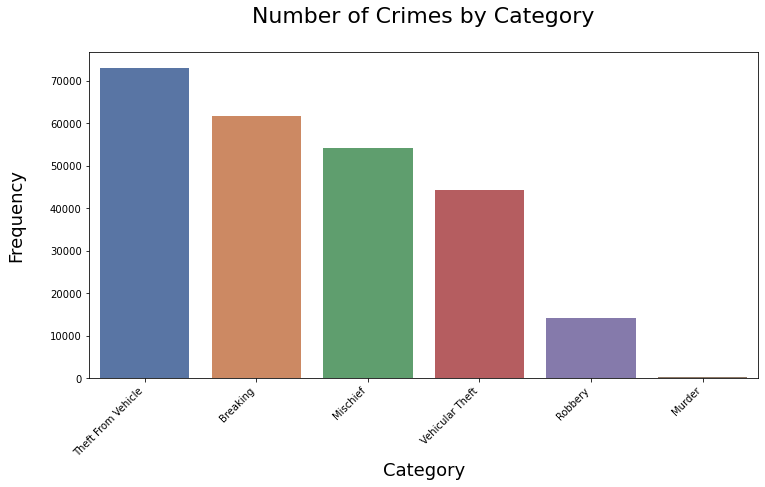

In [5]:
# Get counts per crime type
crime_counts = crime_df['CATEGORIE'].value_counts()

# Plotting graph
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=crime_counts.index, y=crime_counts.values, palette="deep")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_title("Number of Crimes by Category\n", fontsize=22)
ax.set_xlabel("Category", fontsize=18)
ax.set_ylabel("Frequency\n", fontsize=18)
plt.show()

In [7]:
import plotly.express as px
from sklearn.cluster import DBSCAN
new_crime_df = crime_df.iloc[:5000]
fig = px.scatter_mapbox(new_crime_df.dropna(axis=0), lat='LATITUDE', lon='LONGITUDE', hover_name='CATEGORIE',
                        center=dict(lat=0, lon=180), zoom=0, 
                        mapbox_style="stamen-terrain")
#fig.write_html(file='first_figure.html', auto_open=True)
fig.show()

In [8]:
# montreal_team_id = 8

# Finding home games for Montreal team
game_df = pd.read_csv('nhl_data/game.csv')

game_df = game_df[(game_df['home_team_id'] == 8) | (game_df['away_team_id'] == 8)]

# Changing outcome column to 1 if Montreal won, 0 otherwise
game_df['outcome'] = np.where(game_df['outcome'].str.contains('home win'), 1, 0)
game_df = game_df[['game_id', 'date_time_GMT', 'outcome']]
game_df['date_time_GMT'] = pd.to_datetime(game_df['date_time_GMT']).dt.strftime('%m/%d/%Y')
game_df.rename(columns = {'date_time_GMT': 'DATE'}, inplace = True)
game_df

,game_id,DATE,outcome
5,2016020610,01/10/2017,0
26,2017020482,12/15/2017,1
29,2017020706,01/20/2018,0
33,2016020264,11/20/2016,1
46,2017021066,03/12/2018,1
...,...,...,...
26059,2018021232,04/02/2019,1
26076,2018021246,04/04/2019,1
26088,2018021246,04/04/2019,1
26104,2018021259,04/06/2019,1


In [9]:

crime_df = crime_df[['CATEGORIE', 'DATE', 'LONGITUDE', 'LATITUDE']]
crime_df


,CATEGORIE,DATE,LONGITUDE,LATITUDE
0,Vehicular Theft,2018-09-13,-73.626778,45.567780
1,Vehicular Theft,2018-04-30,-73.626778,45.567780
2,Vehicular Theft,2018-09-01,-73.685928,45.519122
3,Mischief,2017-07-21,NaN,NaN
4,Mischief,2017-07-29,NaN,NaN
...,...,...,...,...
247776,Mischief,2023-01-25,-73.787533,45.482397
247777,Vehicular Theft,2023-01-25,NaN,NaN
247778,Theft From Vehicle,2023-01-25,-73.718913,45.505551
247779,Murder,2023-01-25,-73.558643,45.532059


In [10]:
win_df = game_df.loc[game_df['outcome'] == 1]
lose_df = game_df.loc[game_df['outcome'] == 0]
lose_df
win_loss_df = win_df.merge(lose_df, how = "outer")

win_loss_df['DATE'] = pd.to_datetime(win_loss_df['DATE'])
win_loss_df

,game_id,DATE,outcome
0,2017020482,2017-12-15,1
1,2016020264,2016-11-20,1
2,2017021066,2018-03-12,1
3,2016020759,2017-02-03,1
4,2016020143,2016-11-02,1
...,...,...,...
1727,2018021103,2019-03-16,0
1728,2018021125,2019-03-19,0
1729,2018021125,2019-03-19,0
1730,2018021209,2019-03-30,0


In [11]:
diction= dict()
for index, row in crime_df.iterrows():
    if row["DATE"] not in diction:
        diction[row["DATE"]]=1
    else:
        diction[row["DATE"]]+=1

crimes_per_day_df = pd.DataFrame(list(diction.items()), columns = ['DATE', 'CRIME_COUNT'])

# convert the 'Date' column to datetime format
print(crimes_per_day_df)

crimes_per_day_df['DATE']= pd.to_datetime(crimes_per_day_df['DATE'])

crimes_per_day_df.sort_values(by='DATE')
#crimes_per_day_df.to_csv('crimes_per_day.csv')


            DATE  CRIME_COUNT
0     2018-09-13           82
1     2018-04-30           77
2     2018-09-01           89
3     2017-07-21          124
4     2017-07-29           73
...          ...          ...
2985  2023-01-21           76
2986  2023-01-15           93
2987  2023-01-16           85
2988  2023-01-17          100
2989  2023-01-23           91

[2990 rows x 2 columns]


,DATE,CRIME_COUNT
137,2015-01-01,68
1200,2015-01-02,80
1286,2015-01-03,90
118,2015-01-04,51
1111,2015-01-05,103
...,...,...
2572,2023-03-05,49
2573,2023-03-06,70
2965,2023-03-07,70
2963,2023-03-08,75


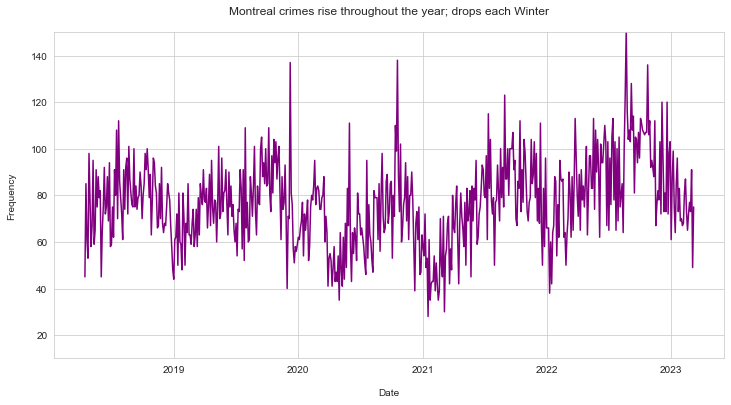

In [12]:
sum_by_criteria = crimes_per_day_df.groupby('DATE')['CRIME_COUNT'].sum()
sum_by_criteria = pd.DataFrame(sum_by_criteria).reset_index()
sum_by_criteria = sum_by_criteria[1200:]
sum_by_criteria = sum_by_criteria[::3]

sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.lineplot(data=sum_by_criteria, x='DATE', y='CRIME_COUNT', color = 'purple')
plt.title('Montreal crimes rise throughout the year; drops each Winter\n')
plt.xlabel('\nDate')
plt.ylabel('Frequency\n')
plt.ylim([10,150])
plt.show()

In [13]:
final_df = win_loss_df.merge(crimes_per_day_df, how = 'inner', on = 'DATE')
final_df.to_csv('final_df.csv')

In [14]:
win_df = final_df.loc[final_df['outcome'] == 1]
lose_df = final_df.loc[final_df['outcome'] == 0]


win_df_new = win_df.sort_values(by = 'DATE')
lose_df_new = lose_df.sort_values(by = 'DATE')
win_df_new

,game_id,DATE,outcome,CRIME_COUNT
147,2014020647,2015-01-16,1,97
159,2014020662,2015-01-18,1,76
143,2014020686,2015-01-21,1,81
151,2014020702,2015-01-28,1,96
150,2014020727,2015-01-31,1,64
...,...,...,...,...
234,2019030023,2020-08-06,1,64
235,2019030024,2020-08-07,1,57
236,2019030024,2020-08-07,1,57
238,2019030111,2020-08-13,1,83


In [15]:
crimes_with_categories = pd.read_csv('total_crimes_with_categories.csv')
crimes_with_categories['DATE']= pd.to_datetime(crimes_with_categories['DATE'])
crimes_with_categories = crimes_with_categories.merge(win_loss_df, how = 'inner', on = 'DATE')
crimes_with_categories

FileNotFoundError: [Errno 2] No such file or directory: 'total_crimes_with_categories.csv'

In [ ]:
final_win_df = crimes_with_categories.loc[crimes_with_categories['outcome'] == 1]
final_lose_df = crimes_with_categories.loc[crimes_with_categories['outcome'] == 0]

final_win_df.head()

,Unnamed: 0,DATE,CRIME_COUNT,Vehicular Theft,Mischief,Robbery,Theft From Vehicle,Breaking,Murder,game_id,outcome
5,15,2015-01-16,97,15,19,8,31,24,0,2014020647,1
6,17,2015-01-18,76,10,16,5,29,16,0,2014020662,1
7,20,2015-01-21,81,14,16,6,20,25,0,2014020686,1
8,27,2015-01-28,96,15,14,8,33,26,0,2014020702,1
10,30,2015-01-31,64,8,10,6,21,19,0,2014020727,1


In [ ]:
vehicular_theft_win = final_win_df['Vehicular Theft'].sum()
mishchief_win = final_win_df['Mischief'].sum()
robbery_win = final_win_df['Robbery'].sum()
theft_from_vehicle_win = final_win_df['Theft From Vehicle'].sum()
breaking_win = final_win_df['Breaking'].sum()
murder_win = final_win_df['Murder'].sum()

murder_win

32

In [ ]:
vehicular_theft_lose = final_lose_df['Vehicular Theft'].sum()
mishchief_lose = final_lose_df['Mischief'].sum()
robbery_lose = final_lose_df['Robbery'].sum()
theft_from_vehicle_lose = final_lose_df['Theft From Vehicle'].sum()
breaking_lose = final_lose_df['Breaking'].sum()
murder_lose = final_lose_df['Murder'].sum()

murder_lose

22

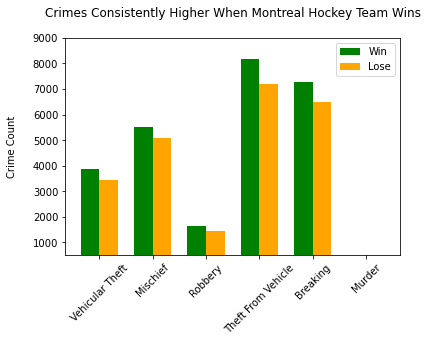

<Figure size 1440x720 with 0 Axes>

In [ ]:
categories = ['Vehicular Theft', 'Mischief', 'Robbery', 'Theft From Vehicle', 'Breaking', 'Murder']
win_values = [vehicular_theft_win, mishchief_win, robbery_win, theft_from_vehicle_win, breaking_win, murder_win]
lose_values = [vehicular_theft_lose, mishchief_lose, robbery_lose, theft_from_vehicle_lose, breaking_lose, murder_lose]




x = np.arange(len(categories))

# set the width of the bars
width = 0.35

# create the figure and axis objects
fig, ax = plt.subplots()
fig = plt.figure(figsize=(20, 10))

# create two sets of bars side-by-side for each category
rects1 = ax.bar(x - width/2, win_values, width, label='Win', color = 'green')
rects2 = ax.bar(x + width/2, lose_values, width, label='Lose', color = 'orange')

# add some labels, titles, and legend
ax.set_ylabel('Crime Count\n')
ax.set_title('Crimes Consistently Higher When Montreal Hockey Team Wins\n')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

for tick in ax.get_xticklabels():
    tick.set_rotation(45)

ax.set_ylim([500,9000])

# display the chart
plt.show()

